In [1]:
%load_ext sql
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/usr/local/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
%sql postgresql://hokamura@localhost/adventar_dev

u'Connected: hokamura@adventar_dev'

In [3]:
%%sql
select
  date_part('day', day) as day,
  round(1.0 * empty_url_count / all_entry_count * 100, 2) as empty_url_rate
from (
  select
    day::date,
    count(1) as all_entry_count,
    count(entries.url = '' or null) as empty_url_count
  from
    entries
    cross join generate_series('2014-12-01', '2014-12-25', INTERVAL '1 day') as day
  where
    entries.date = day
  group by day
) as tmp
order by day

25 rows affected.


day,empty_url_rate
1.0,7.20
2.0,5.29
3.0,8.89
4.0,6.42
5.0,6.05
6.0,5.56
7.0,7.44
8.0,6.31
9.0,6.22
10.0,8.29


In [4]:
df = _.DataFrame()

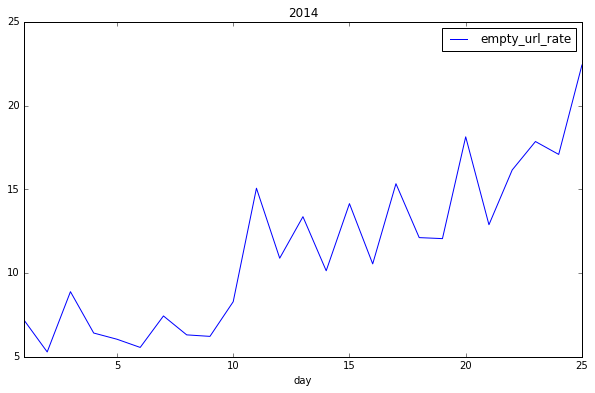

In [5]:
df.astype(float).plot(x = 'day', title = '2014', figsize = (10, 6))